## Multilayer Perceptron: Fit and evaluate a model

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

In this section, we will fit and evaluate a simple Multilayer Perceptron model.

**Multilayer Perceptron**


**Ler Dados**

**Separar Dados em Treinamento e Teste 70/30**

In [1]:
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
import pandas as pd
from sklearn.model_selection import train_test_split
titanic = pd.read_csv('../input/titanic-cleaned/titanic_cleaned.csv')
titanic.head()
features = titanic.drop('Survived', axis=1)
labels = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.3, random_state=42)
for dataset in [y_train, y_test]:
    print(round(len(dataset) / len(labels), 2), len(dataset))

print("Train:",(y_train.values.tolist()).count(0),"(non-survive)",(y_train.values.tolist()).count(1),"(survive)")
print("Test :",(y_test.values.tolist()).count(0),"(non-survive)",(y_test.values.tolist()).count(1),"(survive)")


0.7 623
0.3 268
Train: 392 (non-survive) 231 (survive)
Test : 157 (non-survive) 111 (survive)


PCA Treinamento

In [2]:
import plotly.express as px
from sklearn.decomposition import PCA
X = X_train[["Pclass", "Sex", "Age", "Fare", "Family_cnt", "Cabin_ind"]]
pca = PCA(n_components=2)
components = pca.fit_transform(X)
fig = px.scatter(components, x=0, y=1, color=y_train)
fig.show()


PCA TESTE

In [3]:
import plotly.express as px
from sklearn.decomposition import PCA
X = X_test[["Pclass", "Sex", "Age", "Fare", "Family_cnt", "Cabin_ind"]]
pca = PCA(n_components=2)
components = pca.fit_transform(X)
fig = px.scatter(components, x=0, y=1, color=y_test)
fig.show()


**Matrix de Confusão**

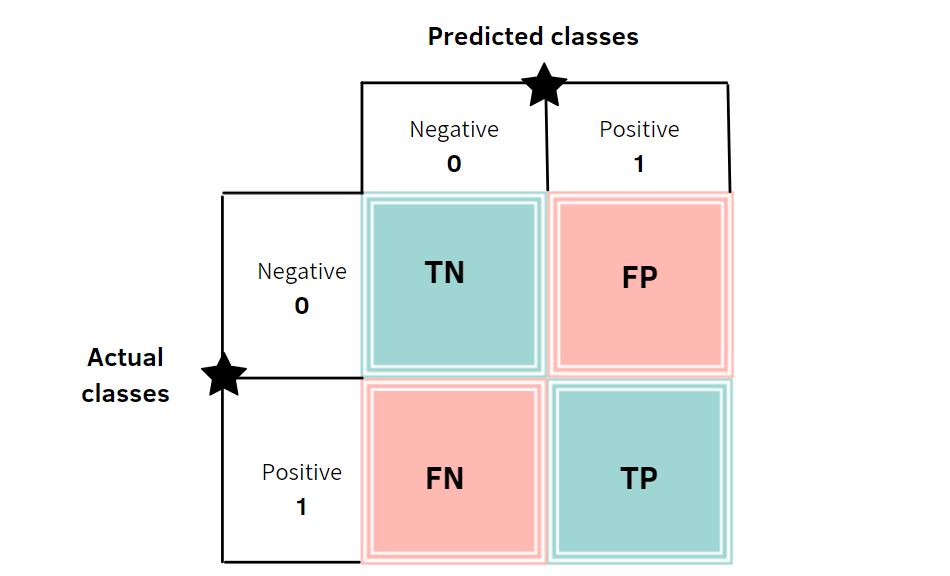

In [4]:
def cm(tn,fp,fn,tp):   
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sn
    import pandas as pd
    import seaborn as sns
    import math
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib as mpl
    mpl.style.use('seaborn')
    conf_arr = np.array([[tn,fp],[fn,tp]])
    sum = conf_arr.sum()
    df_cm = pd.DataFrame(conf_arr,
      index = ['Non-Survive', 'Survive'],
      columns = ['Non-Survive', 'Survive'])
    fig = plt.figure()
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    cmap=sns.color_palette("flare", as_cmap=True)
    res = sn.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, fmt='.0f', 
                     cmap=cmap, annot_kws={"size": 30})
    plt.yticks([0.5,1.5], [ 'Non-Survive', 'Survive'],va='center',fontsize=18)
    plt.xticks(fontsize=18)
    plt.xlabel('Predicted',fontsize=20)
    plt.ylabel('True',fontsize=20)

**Induzir Modelo MLP**

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate.

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? 

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

157 0 110 1
Especificidade: 1.0
Sensibilidade/Recall: 0.009
Precisão 1.0
Acurácia: 0.59
F1-score: 0.018


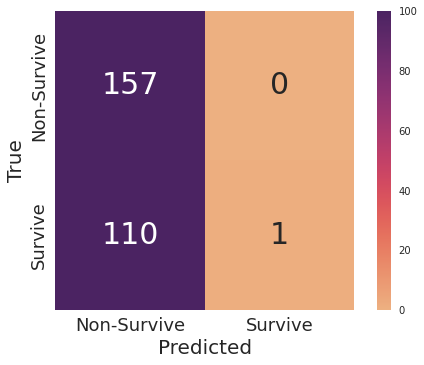

In [5]:
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
    
model = MLPClassifier(hidden_layer_sizes=(10, 10), solver='sgd')
pred=model.fit(X_train, y_train).predict(X_test)
tn,fp,fn,tp = (confusion_matrix(y_test,pred,labels=[0,1]).ravel())
print (tn,fp,fn,tp)
cm(tn,fp,fn,tp)

print("Especificidade:",round(tn/(tn+fp),3))
print("Sensibilidade/Recall:",round(tp/(tp+fn),3))
print("Precisão",round(tp/(tp+fp),3))
print("Acurácia:",round((tp+tn)/(tn+fp+fn+tp),3))
print("F1-score:",round(2*((tp/(tp+fn)) * (tp/(tp+fp))) / ((tp/(tp+fn)) + (tp/(tp+fp))),3))





Busca por hiperparametros utilizando gridsearch


133 24 31 80
Especificidade: 0.847
Sensibilidade/Recall: 0.721
Precisão 0.769
Acurácia: 0.795
F1-score: 0.744


MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 10, 2),
              learning_rate_init=0.01)

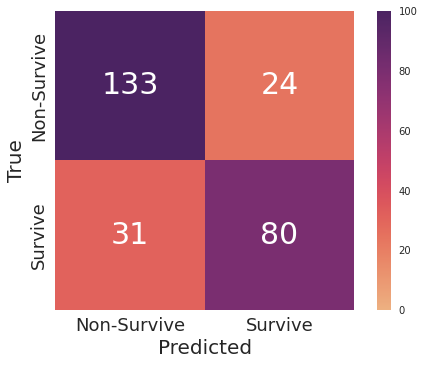

In [6]:
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
param_grid = [{'activation': ['logistic', 'tanh', 'relu'],
             'solver': ['sgd', 'adam'],
             'learning_rate_init': [0.001, 0.01],
             'hidden_layer_sizes': [(10, 10, 2), (4, 4), (5, 10, 5)]}]
#model = MLPClassifier()
model = GridSearchCV(MLPClassifier(),param_grid,refit=True,verbose=0)

pred=model.fit(X_train, y_train).predict(X_test)
tn,fp,fn,tp = (confusion_matrix(y_test,pred,labels=[0,1]).ravel())
print (tn,fp,fn,tp)

print("Especificidade:",round(tn/(tn+fp),3))
print("Sensibilidade/Recall:",round(tp/(tp+fn),3))
print("Precisão",round(tp/(tp+fp),3))
print("Acurácia:",round((tp+tn)/(tn+fp+fn+tp),3))
print("F1-score:",round(2*((tp/(tp+fn)) * (tp/(tp+fp))) / ((tp/(tp+fn)) + (tp/(tp+fp))),3))
cm(tn,fp,fn,tp)

model.best_estimator_